In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from impyute.imputation.cs import mice

Text(0.5, 1.0, 'Korelacja pomiędzy cechami')

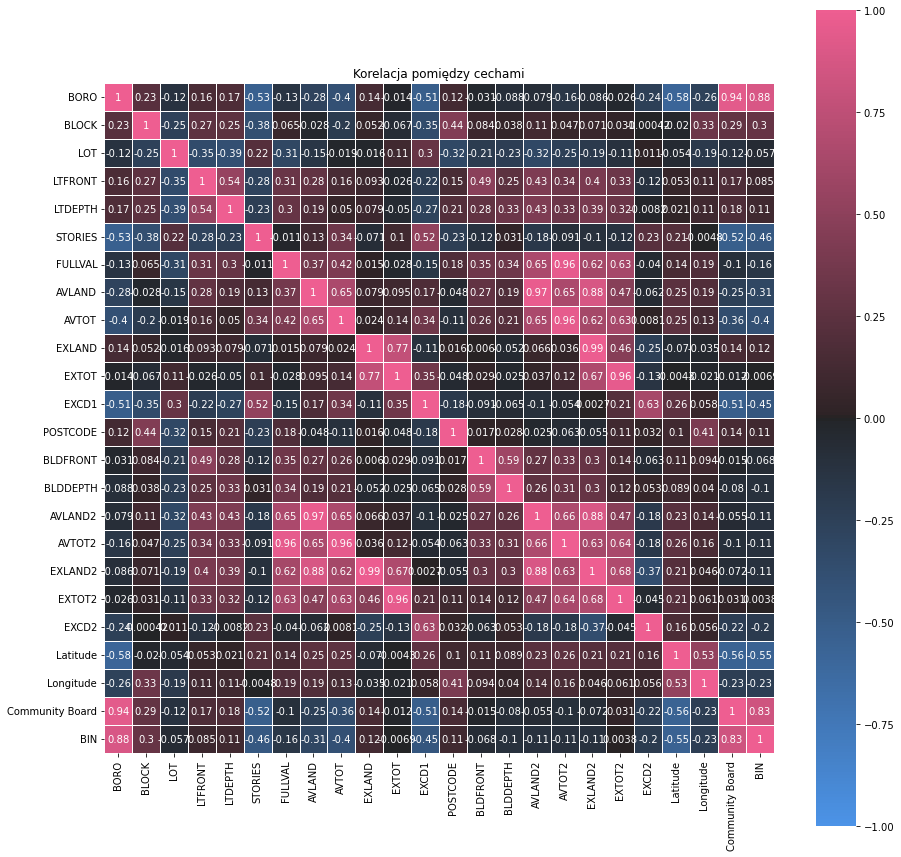

In [208]:
df = pd.read_csv('train_data.csv', delimiter=',', usecols=lambda col: not col.startswith('Unnamed:'), low_memory=False)
# df.head()
# d = df.hist()
plt.subplots(figsize=(15,15))
corr = df.corr(method='kendall')
cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-1, cmap=cmap, square=True, linewidths=0.8, annot=True).set_title("Korelacja pomiędzy cechami")


df = pd.read_csv('train_data.csv', delimiter=',', usecols=lambda col: not col.startswith('Unnamed:'), low_memory=False)

In [207]:

from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('train_data.csv', delimiter=',', usecols=lambda col: not col.startswith('Unnamed:'), low_memory=False)

df=df[['BBLE', 'BORO',
    'TAXCLASS','LTFRONT', 'LTDEPTH', 'Latitude', 'STORIES',
    'FULLVAL','AVTOT','BLDFRONT','BLDDEPTH']]
# df['MANHATTAN'] = df.apply(lambda x: 1 if x['BORO'] == 1 else 0, axis=1)
df.drop(df[df['FULLVAL'] == 0].index, inplace=True)
df['BBLE'] = df['BBLE'].apply(lambda b : b[:10]) #litery na koncu BBLE
df['TAXCLASS'] = df['TAXCLASS'].apply(lambda t : t[:1]) #TAXCLASS uogolniony
df['STORIES'] = df['STORIES'].apply(lambda s: np.NaN if s%1 != 0 else s) #pietra ulamkowe
df = df.replace(0, np.NaN)
# print(df['TAXCLASS'].unique())
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['BORO']]).toarray())
df=pd.concat([df.reset_index(drop=True), encoder_df], axis=1)
df = df.rename(columns={0:'Manhattan', 1:'Bronx', 2:'Brooklyn', 3:'Queens', 4:'Staten Island'})
encoder_df = pd.DataFrame(encoder.fit_transform(df[['TAXCLASS']]).toarray())
df=pd.concat([df.reset_index(drop=True), encoder_df], axis=1)
df = df.rename(columns={0 : 'TAX1', 1: 'TAX2', 2: 'TAX4'})
df = df.drop(columns={'BORO', 'TAXCLASS', 'TAX1', 'Staten Island'})
df.to_csv('czyste_dane.csv')
# encoder_df
# plt.subplots(figsize=(5,5))
# corr = df.corr(method='pearson')
# cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
# sns.heatmap(corr, vmax=1, vmin=-1, cmap=cmap, square=True, linewidths=0.8, annot=True).set_title("Korelacja pomiędzy cechami")

# df